In [1]:
import sys, os, json
sys.path.insert(1, "../../")
from src.combine import combine_data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from src.monitoring.download_customer_prod import download_customer_prod_data

%matplotlib inline
plt.style.use('seaborn')

%load_ext autoreload
%autoreload 2

In [2]:
!pip install --index-url https://build.sofi.com/artifactory/api/pypi/pypi/simple sofiproto==release-1703
!pip install read_protobuf

Looking in indexes: https://build.sofi.com/artifactory/api/pypi/pypi/simple


In [3]:
output_path = f"s3://sofi-data-science/jxu/data_dump/money_customer_risk/20210916-dev-prod-alignment/prod.parquet"
download_customer_prod_data(output_path)

querying money user data...
some data processing...


In [4]:
prod_df = pd.read_parquet(output_path)
prod_df.shape

(1409835, 56)

In [5]:
prod_df.head()

,party_id,created_dt,updated_dt,last_checked_date,last_checked_date_max,risk_group,request_source,model_score,model_decision_rule_details,mcustomer_model_risk_groupodel_score,...,iqt9413,dollar_val_returns_3d,nr_returns_30d,credit_card_loan_amount,transaction_code,age_money_account,fraud_score_1,transaction_code_encoded,all7120_default_encoded,bcc7120_default_encoded
0,3749,2021-08-25 03:36:51.838,2021-09-15 03:47:17.171,2021-09-15 03:47:17.170,2021-09-15 03:47:17.170,"""RG1""","""scheduled""",415.193050,"[{""ruleName"":""isMember"",""rulePassed"":true,""ris...","""RG1""",...,0.0,0.0,0.0,4199.0,ACHDW,30.0,NaN,5,-1.0,-1.0
1,13317,2021-06-09 02:28:21.787,2021-09-15 02:28:10.880,2021-09-15 02:28:10.879,2021-09-15 02:28:10.879,"""RG1""","""scheduled""",404.635070,"[{""ruleName"":""isMember"",""rulePassed"":true,""ris...","""RG1""",...,NaN,0.0,0.0,NaN,ACHDW,449.0,0.0300,5,-1.0,-1.0
2,14192,2020-12-16 03:23:56.753,2021-09-15 02:14:11.971,2021-09-15 02:14:11.970,2021-09-15 02:14:11.970,"""RG2B""","""scheduled""",499.297733,"[{""ruleName"":""isMember"",""rulePassed"":false,""ri...","""RG2B""",...,0.0,0.0,0.0,19353.0,NONE,686.0,0.1243,0,-1.0,-1.0
3,16311,2020-11-18 03:24:05.318,2021-01-27 03:18:52.640,2021-01-20 03:11:26.565,2021-01-20 03:11:26.565,"""RG1""","""scheduled""",505.632059,"[{""ruleName"":""isMember"",""rulePassed"":true,""ris...","""RG1""",...,NaN,0.0,0.0,NaN,None,NaN,NaN,0,-1.0,-1.0
4,32516,2020-11-11 03:46:29.313,2021-09-15 02:16:28.784,2021-09-15 02:16:28.783,2021-09-15 02:16:28.783,"""RG1""","""scheduled""",507.394183,"[{""ruleName"":""isMember"",""rulePassed"":true,""ris...","""RG1""",...,0.0,0.0,0.0,673.0,NONE,745.0,0.0708,0,-1.0,-1.0


In [6]:
# plot date and find the most recent date

In [9]:
prod_df["last_checked_date"] = pd.to_datetime(prod_df["last_checked_date"])

<AxesSubplot:>

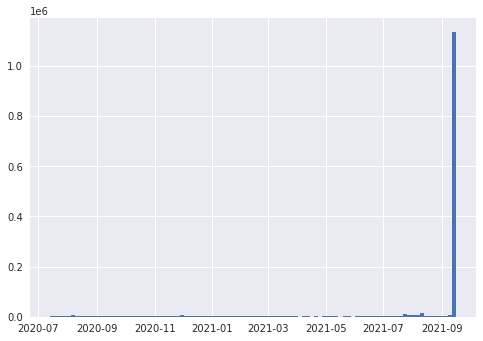

In [10]:
prod_df.last_checked_date.hist(bins=100)

In [15]:
prod_df["last_checked_date"].dt.date.value_counts().head()

2021-09-15    1129952
2021-08-09       6066
2021-07-23       5250
2021-08-10       2970
2021-07-24       2772
Name: last_checked_date, dtype: int64

In [16]:
prod_df.columns

Index(['party_id', 'created_dt', 'updated_dt', 'last_checked_date',
       'last_checked_date_max', 'risk_group', 'request_source', 'model_score',
       'model_decision_rule_details', 'mcustomer_model_risk_groupodel_score',
       'proxy_id', 'risk_group_evaluation_method', 'partner_name',
       'first_deposit_amount', 'vantage_score', 'bcc7120', 'email_risk_score',
       'fraud_score_2', 'name_email_correlation',
       'transaction_as_pct_of_balance', 'mean_account_balance_30d',
       'giact_time_since_last_link', 'phone_risk_score',
       'name_address_correlation', 'all8220', 'lag_acc_open_first_transaction',
       'dollar_val_dd', 'all7120', 'sum_deposits_10d', 'nr_past_transactions',
       'total_tradelines_open', 'education_loan_amount', 'address_risk_score',
       'iqt9415', 'max_withdrawals_30d', 'iln5520', 'max_deposits_30d',
       'pct_returned_deposits', 'giact_nr_decline', 'nr_direct_deposits',
       'time_since_last_transaction', 'bal_ratio', 'name_phone_correla

In [18]:
prod_df.model_decision_rule_details.iloc[0]

'[{"ruleName":"isMember","rulePassed":true,"riskGroupCode":"RG1"},{"ruleName":"noRecentAch","rulePassed":true,"riskGroupCode":"RG1"},{"ruleName":"notHighRisk","rulePassed":true,"riskGroupCode":"RG1"},{"ruleName":"isPlMoneyBundle","rulePassed":false,"riskGroupCode":"RG1"},{"ruleName":"allPass","rulePassed":true,"riskGroupCode":"RG1"}]'

In [19]:
prod_df.risk_group_evaluation_method

0          "CUSTOMER_MODEL"
1          "CUSTOMER_MODEL"
2          "CUSTOMER_MODEL"
3          "CUSTOMER_MODEL"
4          "CUSTOMER_MODEL"
                 ...       
1409830    "CUSTOMER_MODEL"
1409831    "CUSTOMER_MODEL"
1409832    "CUSTOMER_MODEL"
1409833    "CUSTOMER_MODEL"
1409834    "CUSTOMER_MODEL"
Name: risk_group_evaluation_method, Length: 1409835, dtype: object

In [21]:
prod_df.risk_group_evaluation_method.unique()

array(['"CUSTOMER_MODEL"', None, '"CLASSIC"'], dtype=object)

In [13]:
# try querying 2020 10 01 prod data

def download_user_input(proxy_id):
    if not isinstance(proxy_id, str): return 
    req_path = 'data-science-engineering-machine-learning-customer-risk-v2/' + proxy_id + '/request'

    try:
        prbf = s3.get_object(Bucket='machine-learning-proxy.sofi.com', Key=req_path)["Body"].read()
        df_row = read_protobuf(prbf, customer_risk_v2_pb2.CustomerRiskInputV2())
        row_dict = df_row.to_dict('records')[0]
        row_dict["proxy_id"] = proxy_id
        return row_dict

    except botocore.exceptions.ClientError:
        pass
        
def download_customer_prod_data_by_date(output_path, date, debug=False): 
    
    # last record
    money_user_query = f"""
    with df_tmp as
        (select party_id, created_dt, updated_dt, last_checked_date,
            max(last_checked_date) over (partition by party_id) last_checked_date_max,
            json_extract(risk_group_decision_info, '$.newRiskGroup') as risk_group,
            json_extract(json_extract(risk_group_decision_info, '$.decisionContext'), '$.requestSource') as request_source,
            json_extract(json_extract(json_extract(risk_group_decision_info, '$.decisionContext'), '$.customerModelResult'), '$.modelScore') as model_score,
            json_extract(json_extract(json_extract(risk_group_decision_info, '$.decisionContext'), '$.customerModelResult'), '$.decisionRuleDetails') as model_decision_rule_details,
            json_extract(json_extract(json_extract(risk_group_decision_info, '$.decisionContext'), '$.customerModelResult'), '$.customerModelRiskGroup') as mcustomer_model_risk_groupodel_score,
            json_extract(json_extract(json_extract(risk_group_decision_info, '$.decisionContext'), '$.customerModelResult'), '$.machineLearningProxyId') as proxy_id,
            json_extract(json_extract(risk_group_decision_info, '$.decisionContext'), '$.riskGroupEvaluationMethod') as risk_group_evaluation_method,
            COALESCE (CAST(json_extract(json_extract(risk_group_decision_info, '$.decisionContext'), '$.partnerName') as VARCHAR), 'SOFI') as partner_name
        from datalake_production_money_users.risk_group_history)  -- if wanna debug, set limit here
    select * from df_tmp
    where last_checked_date <= date '{date}';
    """
        
    athena = mdsutils.AthenaClient(database='datalake_production_money_users')
    print("querying money user data...")
    money_users_df = athena.query_to_df(money_user_query)
    
    if debug:
        print("debugging mode on")
        money_users_df = money_users_df.head(1000)
    
    print("some data processing...")
    money_users_df.dropna(axis = 0, subset = ['proxy_id'], inplace = True)
    money_users_df['proxy_id'] = money_users_df['proxy_id'].apply(lambda x: x[59:].strip('/').strip('"'))
    money_users_df.dropna(axis = 0, subset = ['proxy_id'], inplace = True)

    # filter by date? If we are only monitoring new account, need to filter by created_dt
#     money_users_df.created_dt = pd.to_datetime(money_users_df.created_dt)
#     money_users_df = money_users_df[money_users_df.created_dt > pd.to_datetime(last_monitoring_date)]

    num_cores = cpu_count()
    with Pool(cpu_count()) as p:
        ret_list = p.map(download_user_input, 
                         [row["proxy_id"] 
                          for _, row in money_users_df.iterrows()])

    # this was breaking the pipeline
    ret_list = list(filter(lambda x: x is not None, ret_list))
    ret_df = pd.DataFrame(ret_list)
    import pdb; pdb.set_trace()
    ret_df = ret_df[~ret_df.proxy_id.isna()]
    full_df = money_users_df.merge(ret_df, how = 'left', on = 'proxy_id')
    full_df = preprocess(full_df)
    
    full_df.to_parquet(output_path)

In [ ]:
# we don't have anything

In [14]:
%%time
import mdsutils
import pickle, sys, os, boto3, botocore
from sofiproto.moneyfraud import customer_risk_v2_pb2
from read_protobuf import read_protobuf
from multiprocessing import Pool, cpu_count
from collections import defaultdict

s3 = boto3.client('s3')

output_path2 = f"s3://sofi-data-science/jxu/data_dump/money_customer_risk/20210916-dev-prod-alignment/prod_by_20201001.parquet"
download_customer_prod_data_by_date(output_path2, "2020-10-01")

querying money user data...
some data processing...
> /tmp/ipykernel_59073/144946158.py(64)download_customer_prod_data_by_date()
     62     ret_df = pd.DataFrame(ret_list)
     63     import pdb; pdb.set_trace()
---> 64     ret_df = ret_df[~ret_df.proxy_id.isna()]
     65     full_df = money_users_df.merge(ret_df, how = 'left', on = 'proxy_id')
     66     full_df = preprocess(full_df)



ipdb>  ret_df


Empty DataFrame
Columns: []
Index: []


ipdb>  q


BdbQuit: 